## OVERVIEW: STATISTICS -Linear Regression-
### In this file we want to predict the trend of all countries for the next 100 years for the net electric consumption, the electric renewable generation and the electric non-renewable generation.

### Some plots show different beheaviour, from '*green countries*' which have more renewable consumption than no renewable, to '*dangerous countries*' which are the opposite behaviour.

### After make the linear regression, we stablish how green/clean are the countries as function of % renewable and non renewable energy consumption. According with that, I label the countries.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


## Read the necessary data

In [2]:
consumption = pd.read_csv('../cleaned_data/consumption.csv')
generation_renewable = pd.read_csv('../cleaned_data/generation_renewable.csv')
generation_norenewable = pd.read_csv('../cleaned_data/generation_fossil.csv')
installations_renewable = pd.read_csv('../cleaned_data/capacity_renewable.csv')


# 1st STEP: DEFINE THE REGRESSION MODEL TO PREDICT TRENDINGS OF ENERGY CONSUMPTION.

In [3]:
def regression(Y):
    #Y energetic information about country Y = consumption.Brazil
    X = sm.add_constant(consumption.year)
    model = sm.OLS(Y,X)
    results = model.fit()
    #Provide a summary of statistics
    #print(results.summary())
    return(results.params)


## Define a function that creates a dataframe where save the prediction for all countries for the next 80 years (until 2100).

In [4]:
#consum
countries_all = consumption.columns[1:]
def feature_prediction(df,df1):
    time = np.arange(2020,2101,1)
    new_df = []
    for i in countries_all:
        a,b = regression(Y=df[i]) 
        equation = time*b+a
        new_df.append(equation)
    df1 = pd.DataFrame(new_df)
    df1 = df1.transpose()
    df1.columns=consumption.columns[1:]
    df1.insert(0,'year',time)  
    return df1

## Save the data information  for the net, renewable and no renewable energy.

In [5]:
consum_future = []
renewable_future = []
norenewable_future = []
consum_future = feature_prediction(consumption,consum_future)
renewable_future = feature_prediction(generation_renewable,renewable_future)
norenewable_future = feature_prediction(generation_norenewable,norenewable_future)

/Users/rubenmartinezlorente/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Check how are the plots of future trendings of net, renewable, non renewable consumption

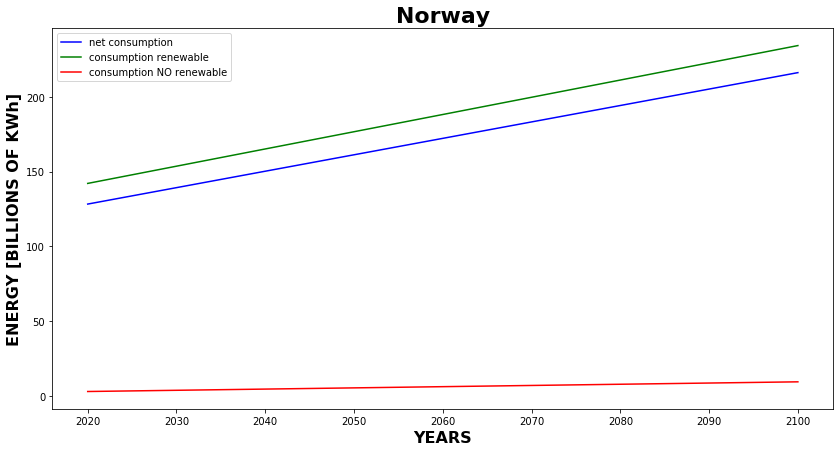

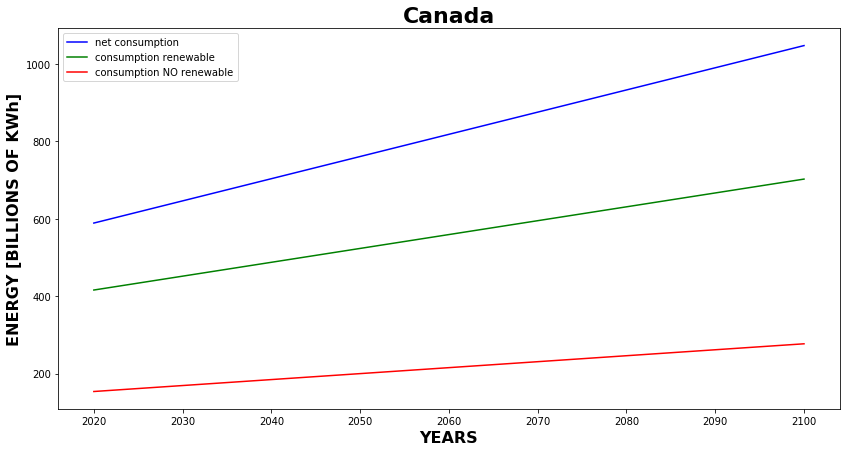

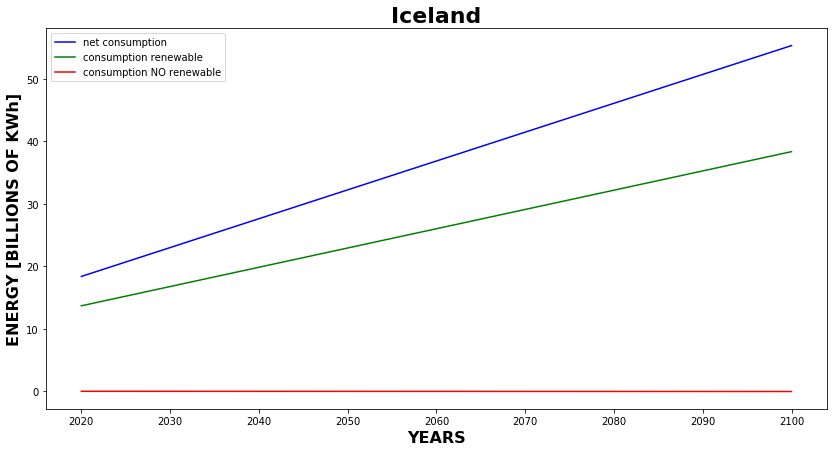

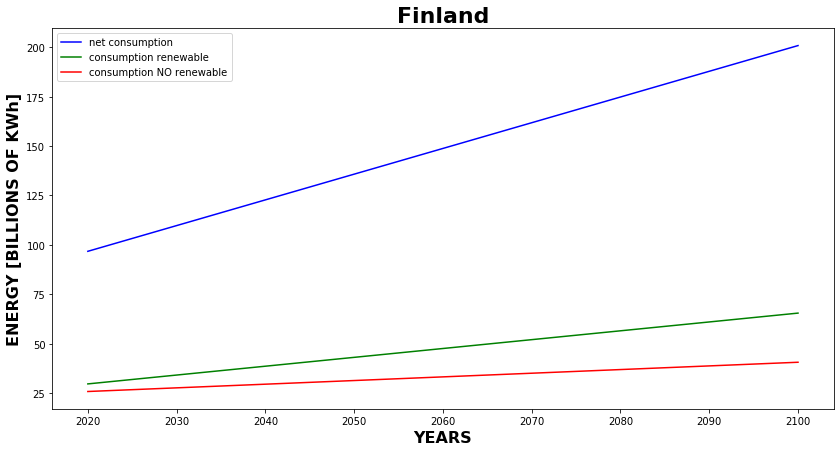

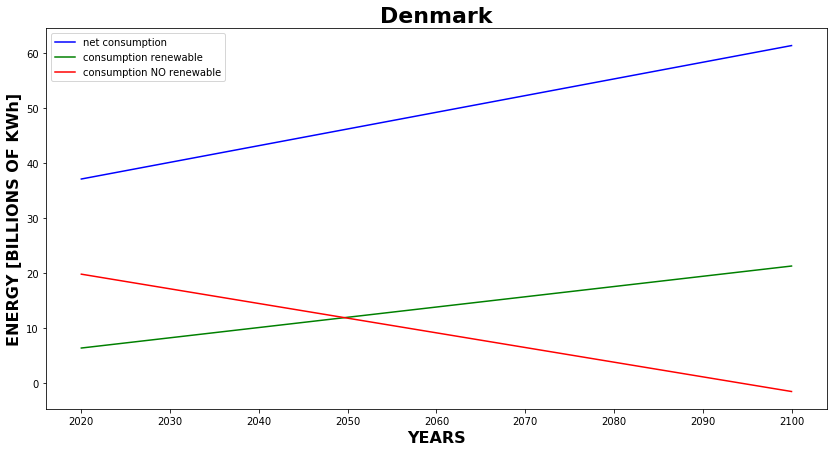

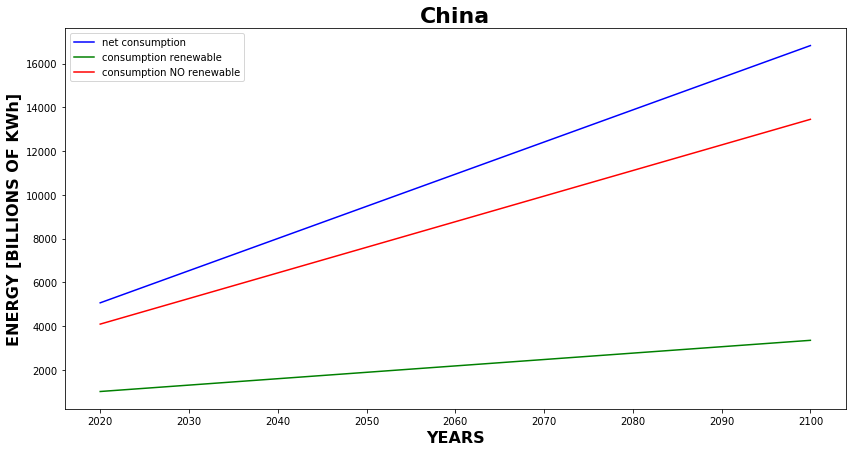

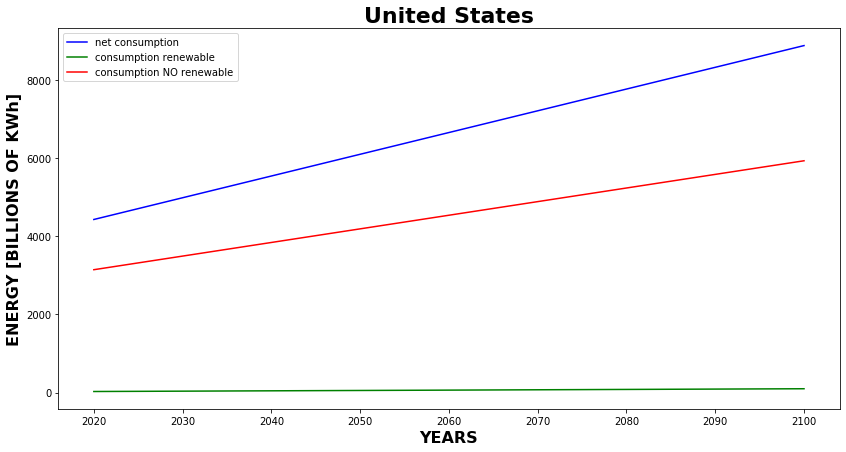

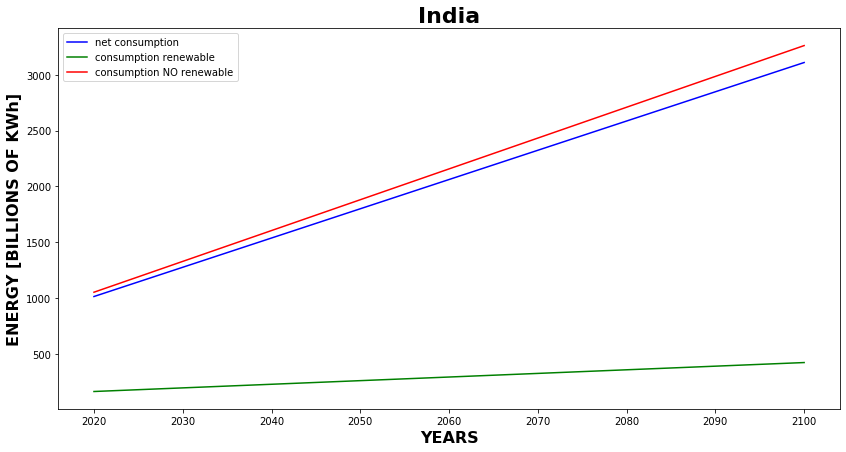

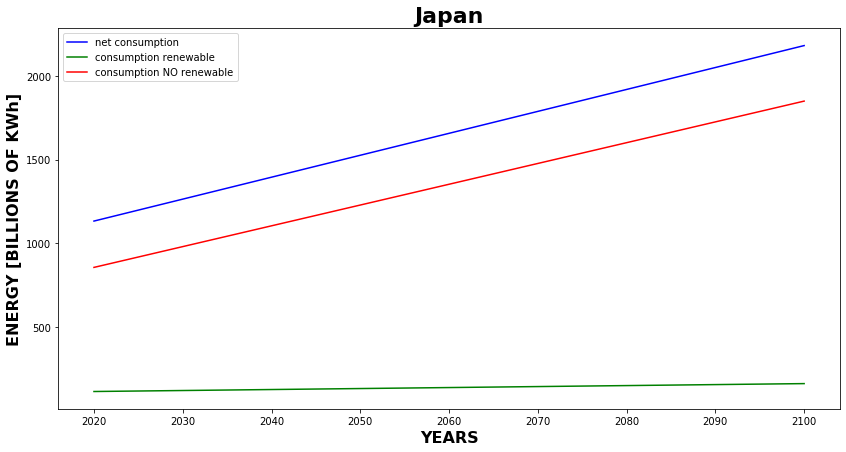

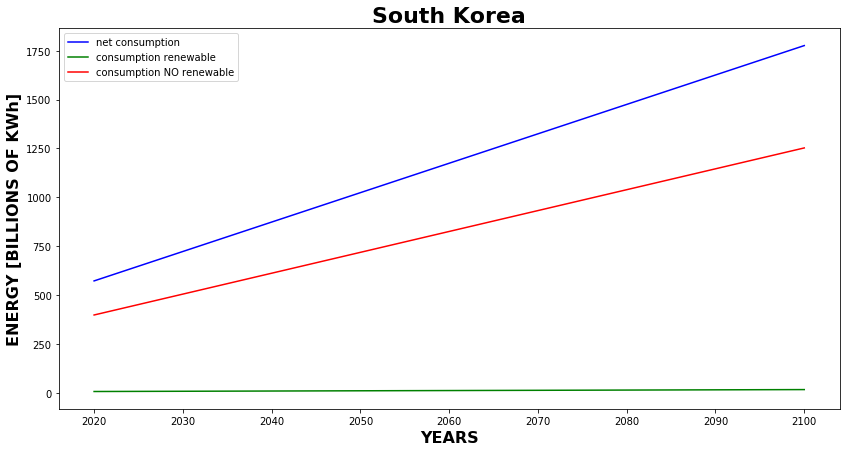

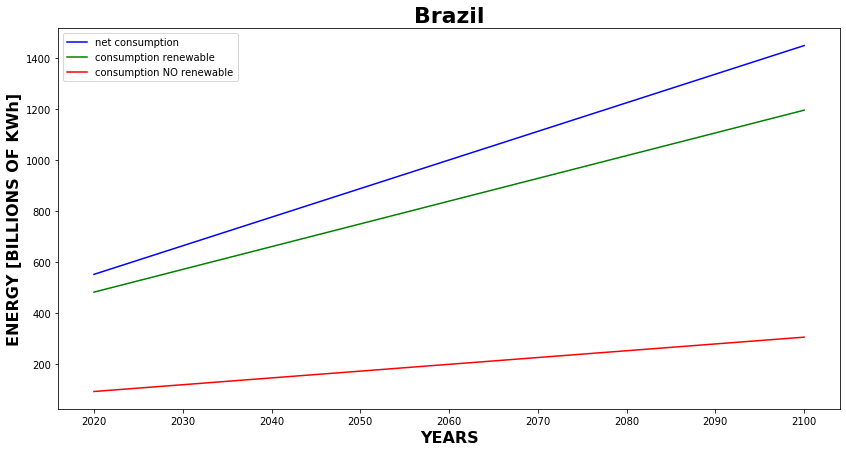

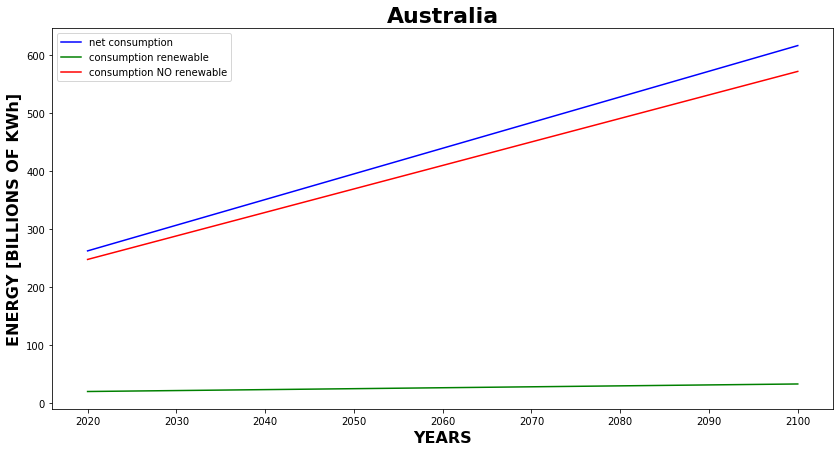

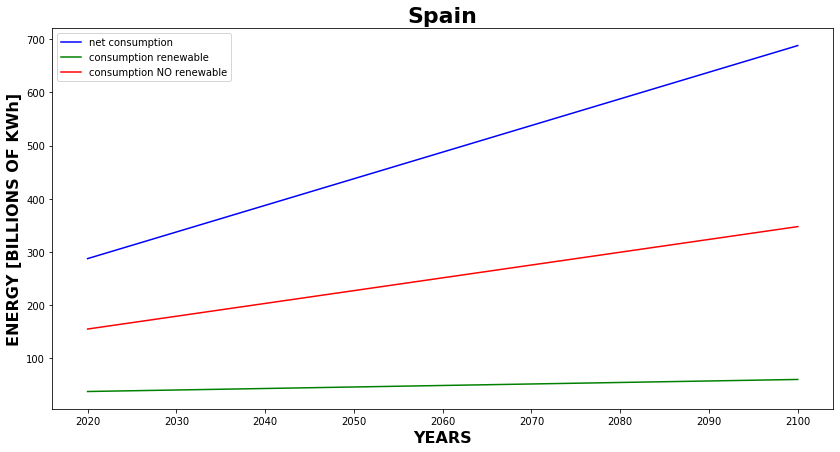

In [6]:
countries= list(['Norway','Canada','Iceland','Finland','Denmark','China','United States','India','Japan','South Korea','Brazil','Australia','Spain'])
for country in countries:

    t = np.arange(2020,2101,1)
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(consum_future.year,consum_future[country], 'b', label= 'net consumption')
    plt.plot(renewable_future.year,renewable_future[country], 'g', label= 'consumption renewable')
    plt.plot(norenewable_future.year,norenewable_future[country], 'r', label= 'consumption NO renewable')


    plt.legend = ax.legend(loc='upper left')
    plt.xlabel('YEARS',fontsize=16,fontweight='bold')
    plt.ylabel('ENERGY [BILLIONS OF KWh]',fontsize=16,fontweight='bold')
    plt.title(country,fontsize=22,fontweight='bold')
    fig.savefig(f'../statistics_linear_regression/plots_countries/{country}.png')

plt.show()

# Definition GOOD/BAD COUNTRY:

## Notation:

### RE: Renowable energy generation
### NRE: No renewable energy generation
### NET: Net electricity consumption

## Energetic Criterio

### **GREEN LIGHT COUNTRIES**: RE > 0.7NET & NRE < 0.3NET
### **WARNING COUNTRIES** :  RE > 0.7NET & NRE > 0.3NET
### **DANGEROUS COUNTRIES**:  RE < 0.7NET & NRE < 0.3NET
### **TOXIC COUNTRIES**  RE < 0.7NET & NRE > 0.3NET


In [7]:
green_light =[]
dangerous = []
toxic = []
other = []
warning = []

def good_ugly_bad():
    for r in renewable_future.columns[1:]:
        if (renewable_future[r][80] >0.7*consum_future[r][80]) & ((norenewable_future[r][80] <0.3*consum_future[r][80])):
            green_light.append(r)
        elif (renewable_future[r][80] >0.7*consum_future[r][80]) & (norenewable_future[r][80] >0.3*consum_future[r][80]):
            warning.append(r)
        elif (renewable_future[r][80] <0.7*consum_future[r][80]) & (norenewable_future[r][80] <0.3*consum_future[r][80]):
            dangerous.append(r)
        elif (renewable_future[r][80] <0.7*consum_future[r][80]) & (norenewable_future[r][80] >0.3*consum_future[r][80]):
            toxic.append(r)
        else:
            other.append(r)
            
            
good_ugly_bad()

In [10]:
labels = [green_light, warning , dangerous , toxic , other]
header = ['green light countries', 'warning countries', 'dangerous countries', 'toxic countries', 'other']
label_countries=pd.DataFrame(labels).transpose()
label_countries.columns = header
label_countries
label_countries.to_csv('../statistics_linear_regression/label_countries.csv',index=False)

In [11]:
label = pd.Series(['green light countries','warning countries','dangerous countries','toxic countries'])
values = pd.Series([23,9,19,136])  
frame = { 'label': label, 'values': values } 
  
label_ST = pd.DataFrame(frame) 
label_ST

,label,values
0,green light countries,23
1,warning countries,9
2,dangerous countries,19
3,toxic countries,136


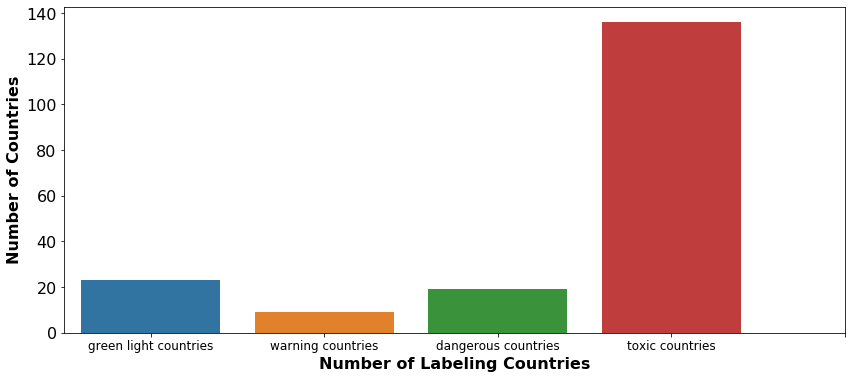

In [12]:

f, ax = plt.subplots(1,figsize=(14,6))
sns.barplot(['green light countries', 'warning countries', 'dangerous countries', 'toxic countries'],[23,9,19,136])
plt.xticks(np.arange(5),fontsize  =12)
plt.yticks(fontsize  =16)
plt.xlabel('Number of Labeling Countries',fontsize=16,fontweight='bold')
plt.ylabel('Number of Countries', fontsize=16,fontweight='bold')
f.savefig(f'../statistics_linear_regression/label_countries_barplot.png')

plt.show()